In [30]:
import json

# Path to your JSON file
awq_1_3b = "opt-1.3b.txt"
our_awq_1_3b = "opt-1.3b-our-awq.txt"

# Open and load the JSON file
with open(awq_1_3b, "r") as f:
    awq_1_3b_data = json.load(f)  # data should be a list of dictionaries
with open(our_awq_1_3b, "r") as f:
    our_awq_1_3b_data = json.load(f)  # data should be a list of dictionaries

# If you want to, you can store the results in lists for further analysis:
awq_1_3b_runs = [entry["run"] for entry in awq_1_3b_data]
awq_1_3b_ppls = [entry["ppl"] for entry in awq_1_3b_data]
our_awq_1_3b_runs = [entry["run"] for entry in our_awq_1_3b_data]
our_awq_1_3b_ppls = [entry["ppl"] for entry in our_awq_1_3b_data]

# Example: print the average PPL
awq_1_3b_average_ppl = sum(awq_1_3b_ppls) / len(awq_1_3b_ppls)
print(f"Average PPL of the original AWQ: {awq_1_3b_average_ppl}")

our_awq_1_3b_average_ppl = sum(our_awq_1_3b_ppls) / len(our_awq_1_3b_ppls)
print(f"Average PPL of our AWQ: {our_awq_1_3b_average_ppl}")

# Hypothesis test whether the difference is significant
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(awq_1_3b_ppls, our_awq_1_3b_ppls, alternative="greater")
print(f"p-value of the hypothesis test: {p_value}")
if p_value < 0.05:
    print("The difference is significant.")


Average PPL of the original AWQ: 14.956893243789672
Average PPL of our AWQ: 14.886449728012085
p-value of the hypothesis test: 0.00012160093968595141
The difference is significant.


In [28]:
# Path to your JSON file
awq_2_7b = "opt-2.7b.txt"
our_awq_2_7b = "opt-2.7b-our-awq.txt"

# Open and load the JSON file
with open(awq_2_7b, "r") as f:
    awq_2_7b_data = json.load(f)  # data should be a list of dictionaries
with open(our_awq_2_7b, "r") as f:
    our_awq_2_7b_data = json.load(f)  # data should be a list of dictionaries

# If you want to, you can store the results in lists for further analysis:
awq_2_7b_runs = [entry["run"] for entry in awq_2_7b_data]
awq_2_7b_ppls = [entry["ppl"] for entry in awq_2_7b_data]
our_awq_2_7b_runs = [entry["run"] for entry in our_awq_2_7b_data]
our_awq_2_7b_ppls = [entry["ppl"] for entry in our_awq_2_7b_data]

# Example: print the average PPL
awq_2_7b_average_ppl = sum(awq_2_7b_ppls) / len(awq_2_7b_ppls)
print(f"Average PPL of the original AWQ: {awq_2_7b_average_ppl}")

our_awq_2_7b_average_ppl = sum(our_awq_2_7b_ppls) / len(our_awq_2_7b_ppls)
print(f"Average PPL of our AWQ: {our_awq_2_7b_average_ppl}")

# Hypothesis test whether the difference is significant
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(awq_2_7b_ppls, our_awq_2_7b_ppls, alternative='greater')
print(f"p-value of the hypothesis test: {p_value}")
if p_value < 0.05:
    print("The difference is significant.")


Average PPL of the original AWQ: 12.762138710021972
Average PPL of our AWQ: 12.709150953292847
p-value of the hypothesis test: 4.548645772361206e-05
The difference is significant.


Variance of the PPLs of the original AWQ 1.3b: 0.018838640000563737
Variance of the PPLs of our AWQ 1.3b: 0.01342949427462545
Variance of the PPLs of the original AWQ 2.7b: 0.009140297382701102
Variance of the PPLs of our AWQ 2.7b: 0.00876841699519091
p-value of the hypothesis test for the variance of the PPLs of 1.3b: 0.3010716034317114
p-value of the hypothesis test for the variance of the PPLs of 2.7b: 0.7974597121643


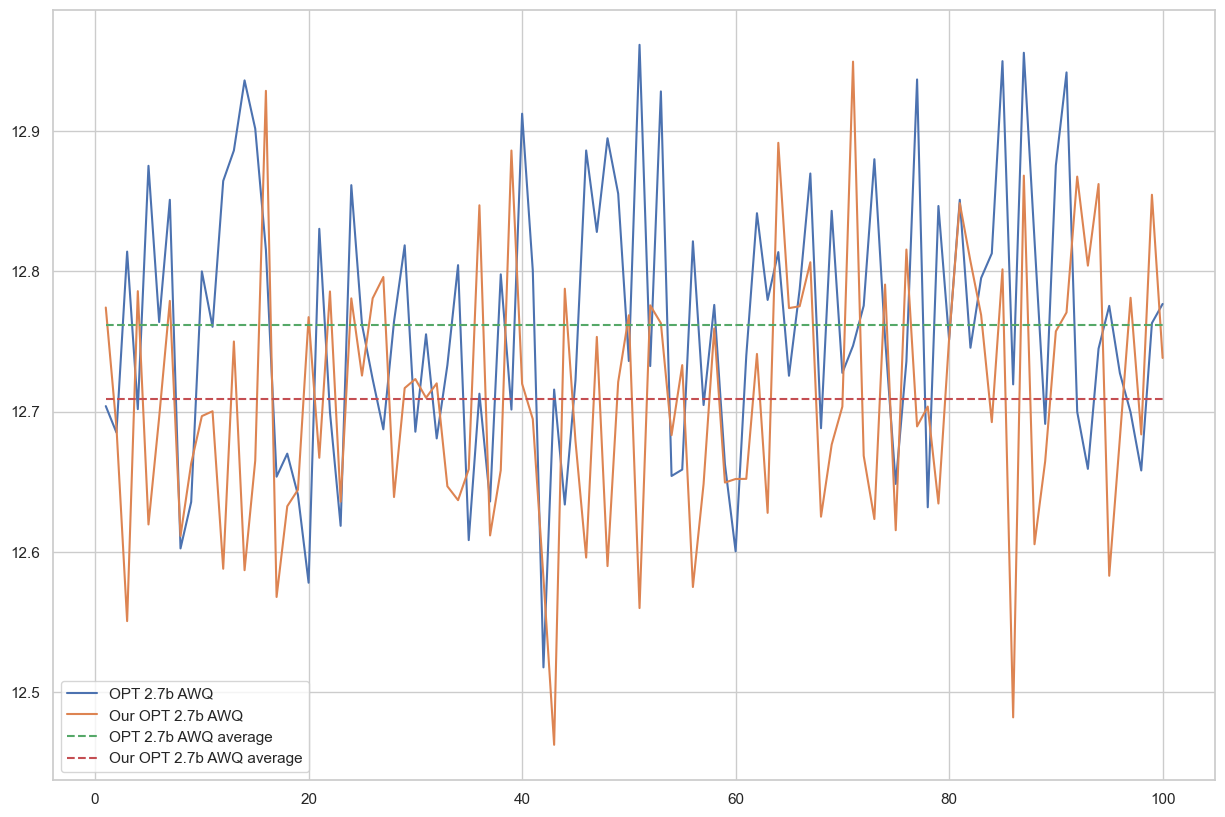

In [25]:
# Plot the ppl of the original AWQ and our AWQ wrt. the run, indicate the average PPL use seaborn

import seaborn as sns

# sns.lineplot(x=awq_1_3b_runs, y=awq_1_3b_ppls, label="OPT 1.3b AWQ")
# sns.lineplot(x=our_awq_1_3b_runs, y=our_awq_1_3b_ppls, label="Our OPT 1.3b AWQ")
# sns.lineplot(x=awq_1_3b_runs, y=[awq_1_3b_average_ppl] * len(awq_1_3b_runs), label="OPT 1.3b AWQ average", linestyle="--")
# sns.lineplot(x=our_awq_1_3b_runs, y=[our_awq_1_3b_average_ppl] * len(our_awq_1_3b_runs), label="Our OPT 1.3b AWQ average", linestyle="--")

# New plot for 2.7b model
sns.lineplot(x=awq_2_7b_runs, y=awq_2_7b_ppls, label="OPT 2.7b AWQ")
sns.lineplot(x=our_awq_2_7b_runs, y=our_awq_2_7b_ppls, label="Our OPT 2.7b AWQ")
sns.lineplot(x=awq_2_7b_runs, y=[awq_2_7b_average_ppl] * len(awq_2_7b_runs), label="OPT 2.7b AWQ average", linestyle="--")
sns.lineplot(x=our_awq_2_7b_runs, y=[our_awq_2_7b_average_ppl] * len(our_awq_2_7b_runs), label="Our OPT 2.7b AWQ average", linestyle="--")

# The variance of the PPLs
import numpy as np

awq_1_3b_variance = np.var(awq_1_3b_ppls)
print(f"Variance of the PPLs of the original AWQ 1.3b: {awq_1_3b_variance}")
our_awq_1_3b_variance = np.var(our_awq_1_3b_ppls)
print(f"Variance of the PPLs of our AWQ 1.3b: {our_awq_1_3b_variance}")

awq_2_7b_variance = np.var(awq_2_7b_ppls)
print(f"Variance of the PPLs of the original AWQ 2.7b: {awq_2_7b_variance}")
our_awq_2_7b_variance = np.var(our_awq_2_7b_ppls)
print(f"Variance of the PPLs of our AWQ 2.7b: {our_awq_2_7b_variance}")

# Test whether the variance is significantly different
from scipy.stats import levene

t_statistic, p_value = levene(awq_1_3b_ppls, our_awq_1_3b_ppls)
print(f"p-value of the hypothesis test for the variance of the PPLs of 1.3b: {p_value}")
if p_value < 0.05:
    print("The variance is significantly different.")

t_statistic, p_value = levene(awq_2_7b_ppls, our_awq_2_7b_ppls)
print(f"p-value of the hypothesis test for the variance of the PPLs of 2.7b: {p_value}")
if p_value < 0.05:
    print("The variance is significantly different.")
